In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

#### Import Sales Data 

In [98]:
sales = pd.read_csv('train.csv')

C:\Users\arjun\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [99]:
sales.shape

(1017209, 9)

In [100]:
sales.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [101]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [102]:
sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [103]:
#Average sales per day 5773 euros
#Max sales per day 41551 euros
#Average number of Customers per day 633
#Minimum number of customers is 0 and max number of customers per day is 7388

### Import store data 

In [104]:
store = pd.read_csv('store.csv')

In [105]:
store.shape

(1115, 10)

In [106]:
store.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [107]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [108]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [109]:
# on average, the competition distance is 5404 meters away (5.4 kms)

## EXPLORE SALES DATASET 

Missing Values Check

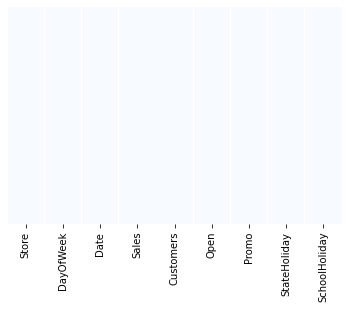

In [110]:
sns.heatmap(sales.isnull(), yticklabels=False, cbar = False, cmap = 'Blues')

In [111]:
#So the sales dataset doesn't have any missing values

Distribution of variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F45B0CA00>,
      dtype=object)

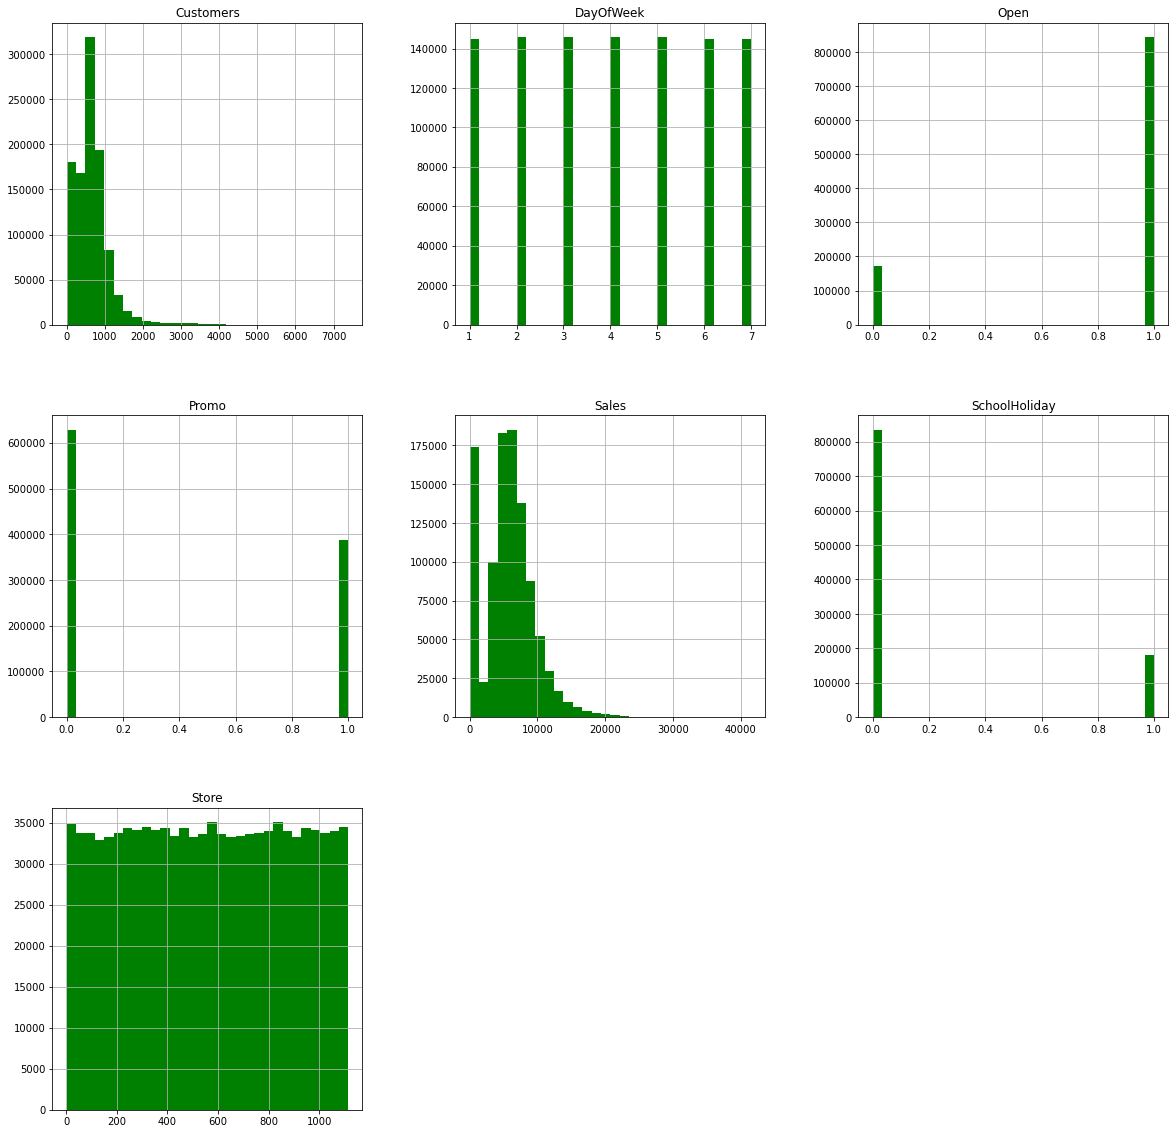

In [112]:
sales.hist(bins = 30, figsize = (20,20), color = 'g')

In [113]:
# Average ~600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time 
# Average sales around 5000-6000 Euros
# School holidays are around ~18% of the time

In [114]:
#Lets see how many stores are open and how many closed
print ("Number of stores open =", sales[sales.Open == 1].shape[0])
print ("Number of stores closed =", sales[sales.Open == 0].shape[0])


Number of stores open = 844392
Number of stores closed = 172817


In [115]:
#Let us focus on the stores that are only open
sales_df = sales[sales['Open']==1]

In [116]:
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [117]:
sales_df.describe()
# Average sales = 6955 Euros,	average number of customers = 762	(went up)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.0,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,1.0,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.0,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000


## EXPLORE STORE DATASET 

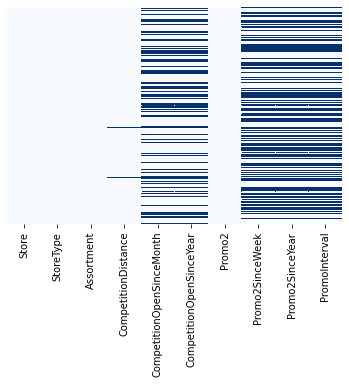

In [118]:
#Let's see if we have any missing data in the store information dataframe!
sns.heatmap(store.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

In [119]:
 #Missing values in CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, 
 #Promo2SinceWeek, Promo2SinceYear, PromoInterval    

In [120]:
store[store.CompetitionDistance.isnull()]
#Only 3 rows have missing values. Negligible

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [121]:
store[store.CompetitionOpenSinceMonth.isnull()].shape[0]
#354 rows have missing values in CompetitionOpenSinceMonth column with a total of 1115 rows. That is almost 32%

354

In [122]:
store[store.CompetitionOpenSinceYear.isnull()].shape[0]
#354 rows have missing values in CompetitionOpenSinceMonth column with a total of 1115 rows. That is almost 32%

354

In [123]:
store[store.Promo2SinceWeek.isnull()].shape[0]
#544 rows have missing values = Promo2SinceWeek

544

In [124]:
store[store.Promo2SinceYear.isnull()].shape[0]

544

In [125]:
store[store.PromoInterval.isnull()].shape[0]

544

In [126]:
store[store.Promo2 == 0].shape[0]

544

In [127]:
store[store['Promo2']==0][['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Promo2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 1113
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Promo2SinceWeek  0 non-null      float64
 1   Promo2SinceYear  0 non-null      float64
 2   PromoInterval    0 non-null      object 
 3   Promo2           544 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 21.2+ KB


In [128]:
#It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information are all NANS
#There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing
#Let's set these values to zeros 
columns_NA = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth' ]
for column in columns_NA:
    store[column].fillna(0, inplace = True)

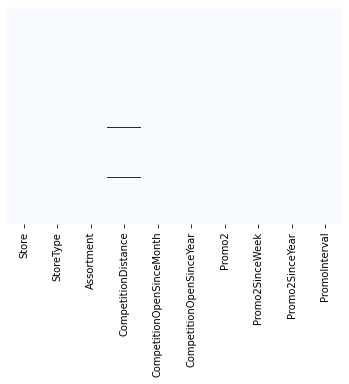

In [129]:
sns.heatmap(store.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [130]:
#There are 3 rows with 'competitionDistance' values missing.
#let's fill them up with with average values of the 'CompetitionDistance' column
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F1F154610>,
      dtype=object)

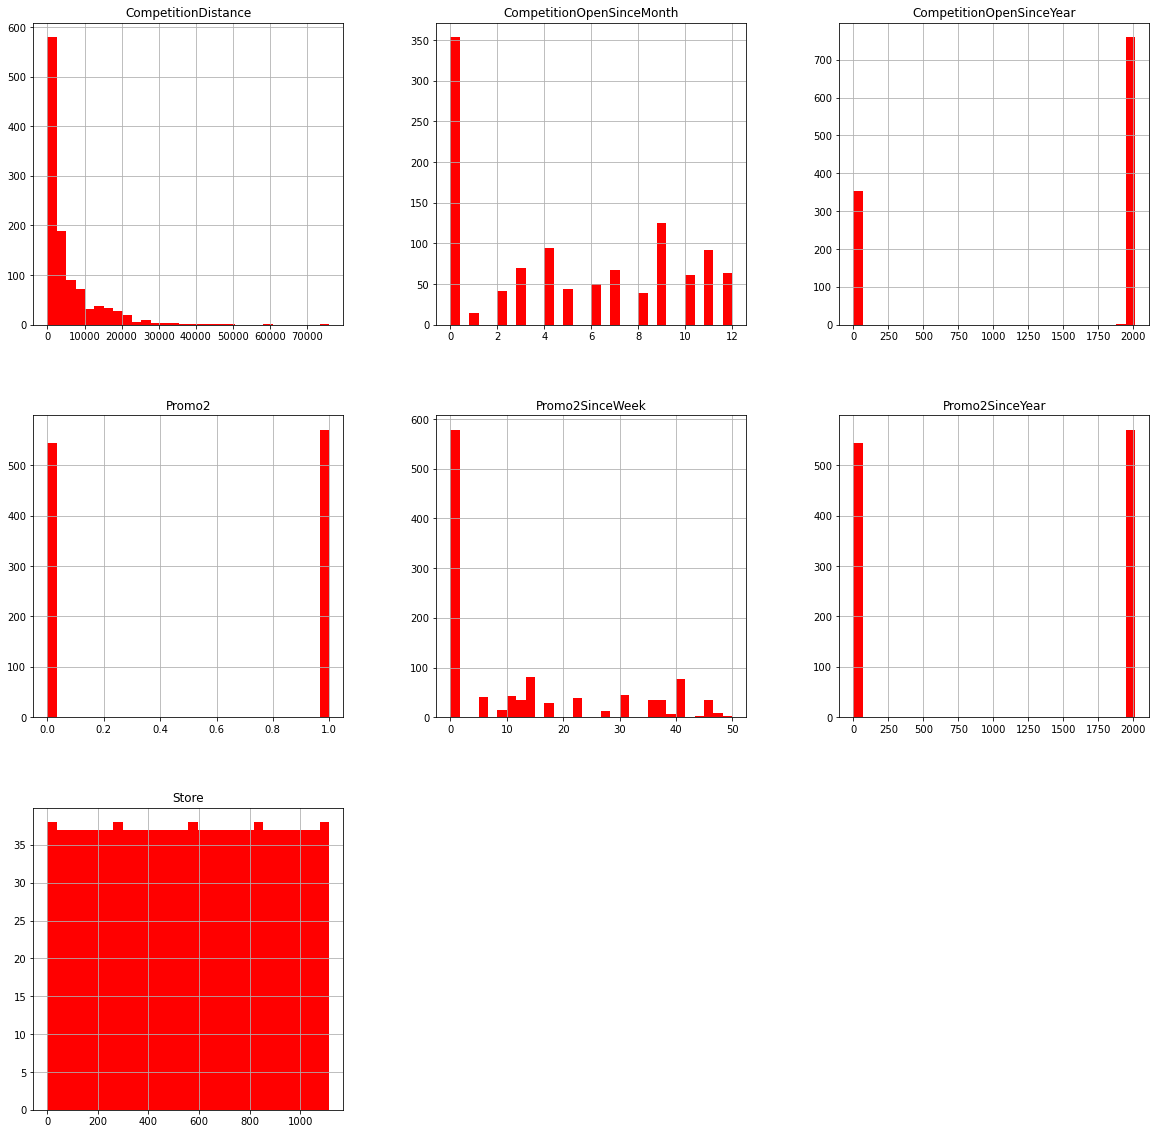

In [131]:
store.hist(bins = 30, figsize=(20,20), color = 'r')
# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)

In [132]:
store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [133]:
sales.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


## EXPLORE MERGED DATASETS 

In [134]:
df_all = pd.merge(store, sales, how = 'inner', on = 'Store')

In [135]:
df_all.to_csv('test.csv', index = False)

In [136]:
df_all.corr()['Sales'].sort_values(ascending = False)
# customers and promo are positively correlated with the sales 
# Promo2 does not seem to be effective at all 

Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
Store                        0.005126
CompetitionOpenSinceYear     0.002749
CompetitionOpenSinceMonth   -0.012431
CompetitionDistance         -0.019207
Promo2SinceWeek             -0.044143
Promo2                      -0.091040
Promo2SinceYear             -0.091056
DayOfWeek                   -0.462125
Name: Sales, dtype: float64

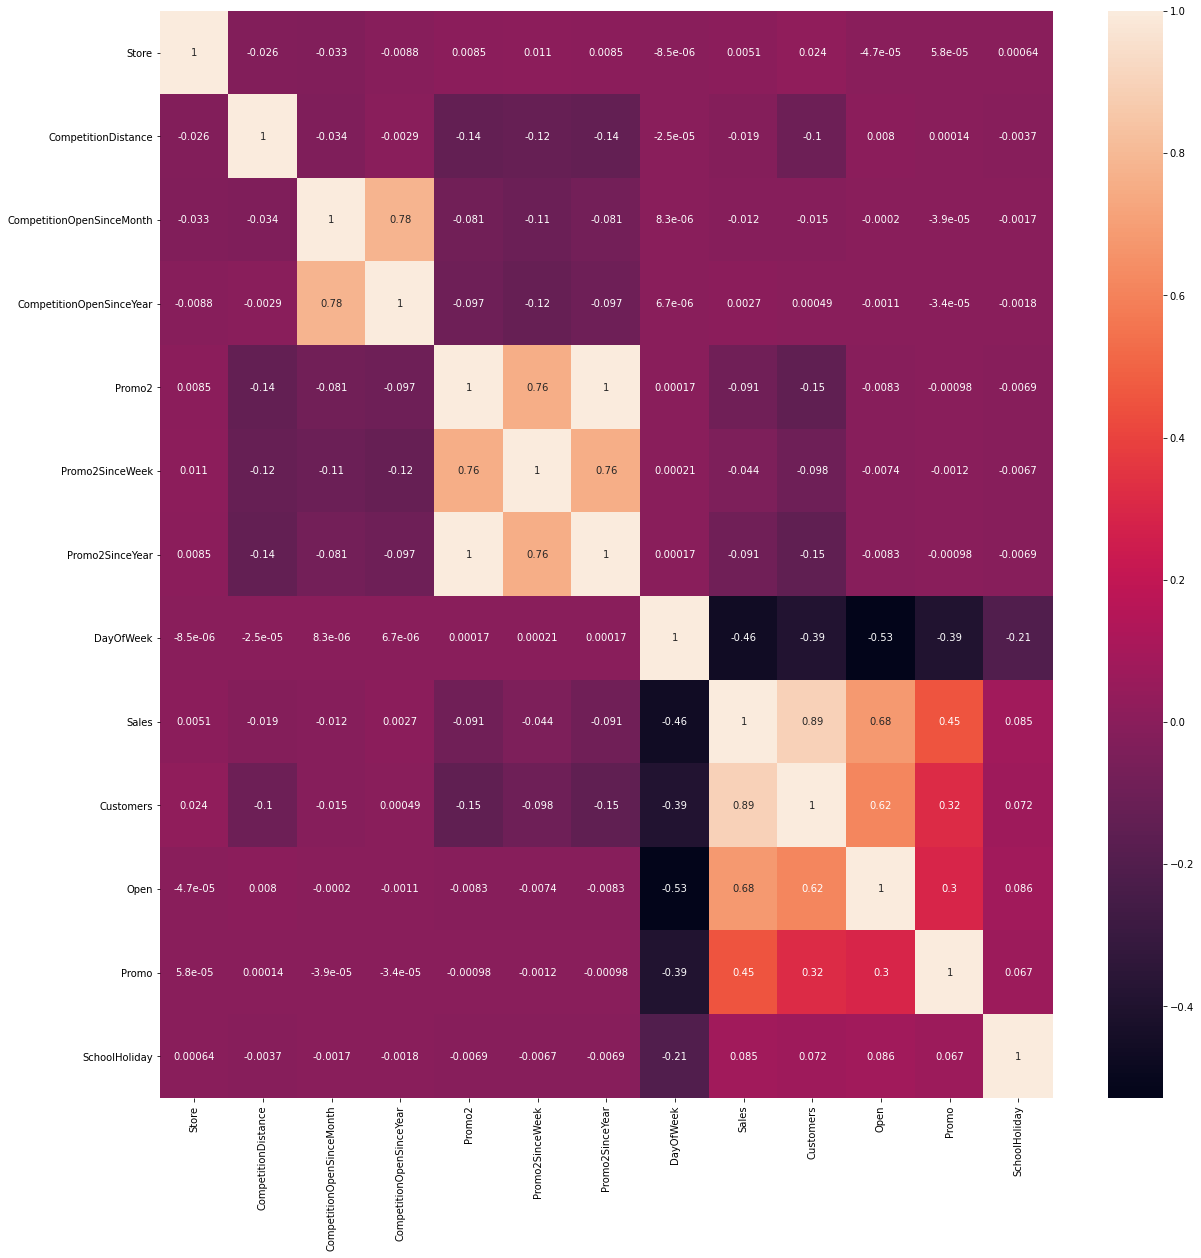

In [137]:
correlations = df_all.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations,  annot = True)
# Customers/Prmo2 and sales are strongly correlated 

In [138]:
# Let's separate the year, month and dayand put it into a separate column 
df_all['Year'] = pd.to_datetime(df_all['Date']).dt.year

In [139]:
df_all['Month'] = pd.to_datetime(df_all['Date']).dt.month
df_all['Day'] = pd.to_datetime(df_all['Date']).dt.day

In [140]:
df_all.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,...,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,...,2015-07-30,5020,546,1,1,0,1,2015,7,30
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,...,2015-07-29,4782,523,1,1,0,1,2015,7,29


Text(0.5, 1.0, 'Average Customers Per Month')

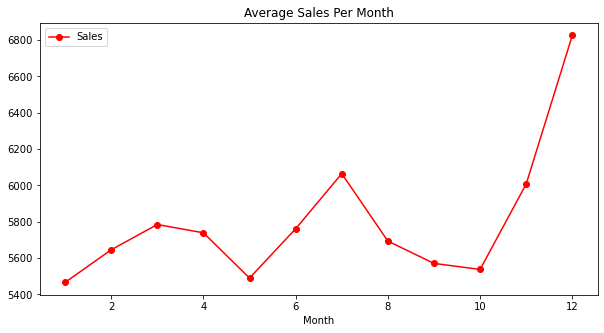

<Figure size 432x288 with 0 Axes>

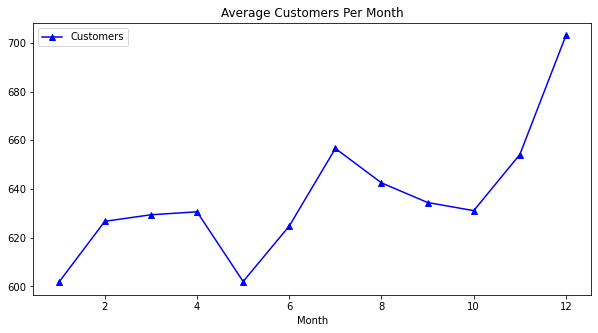

In [141]:
# Let's take a look at the average sales and number of customers per month 
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column  
# It looks like sales and number of customers peak around christmas timeframe
axis = df_all.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')

plt.figure()
axis = df_all.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Month')


Text(0.5, 1.0, 'Average Sales Per Month')

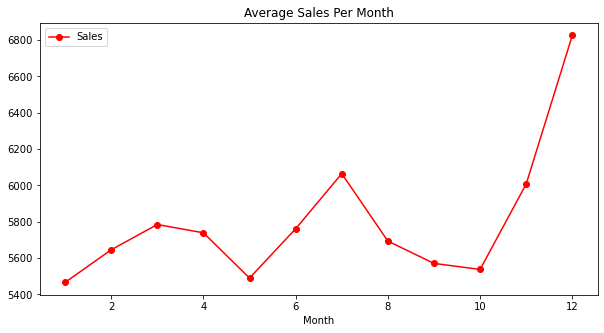

In [142]:
a = df_all.groupby('Month')[['Sales']].mean().plot(figsize =(10,5), marker = 'o', color = 'r')
a.set_title('Average Sales Per Month')

Text(0.5, 1.0, 'Average Customers Per Month')

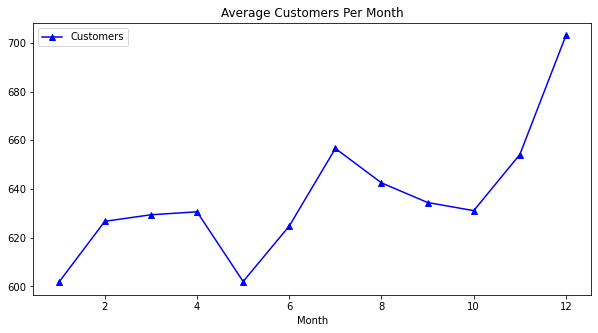

In [143]:
b = df_all.groupby('Month')[['Customers']].mean().plot(figsize =(10,5), marker = '^', color = 'b')
b.set_title('Average Customers Per Month')

Text(0.5, 1.0, 'Average Customers Per Day')

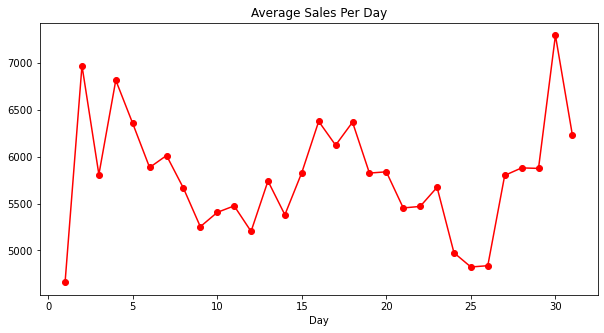

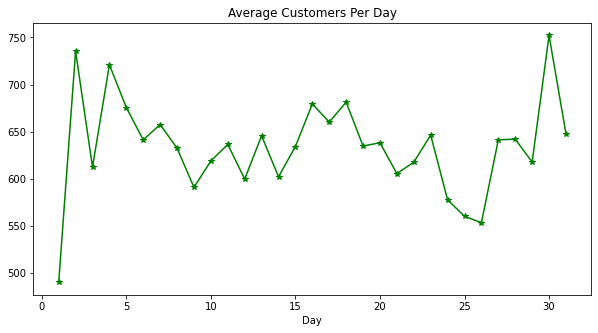

In [144]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month 
# Most customers and sales are around 30th and 1st of the month
axis = df_all.groupby('Day')['Sales'].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day')
plt.figure()
axis = df_all.groupby('Day')['Customers'].mean().plot(figsize = (10,5), marker = '*', color = 'g')
axis.set_title('Average Customers Per Day')

Text(0.5, 1.0, 'Average Customers by Day of Week')

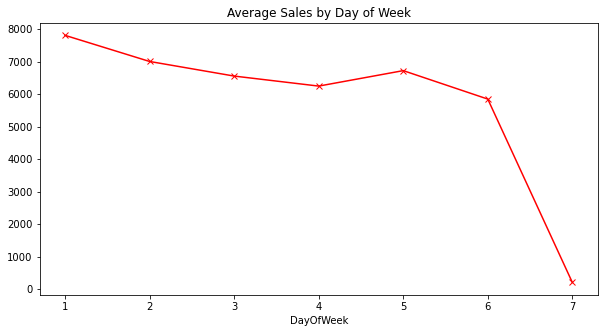

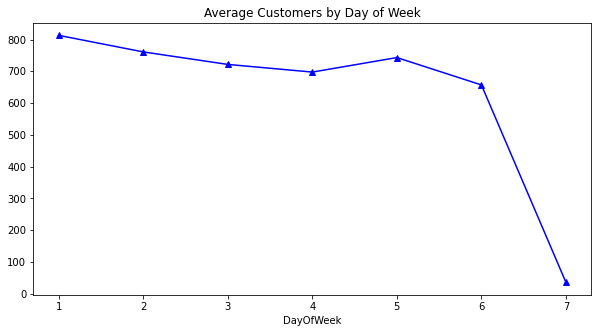

In [145]:
# Let's do the same for the day of the week  (note that 7 = Sunday)
ax = df_all.groupby('DayOfWeek')['Sales'].mean().plot(figsize = (10,5), marker = 'x', color = 'r')
ax.set_title('Average Sales by Day of Week')

plt.figure()

ax = df_all.groupby("DayOfWeek")['Customers'].mean().plot(figsize=(10,5), marker = '^', color = 'b')
ax.set_title('Average Customers by Day of Week')

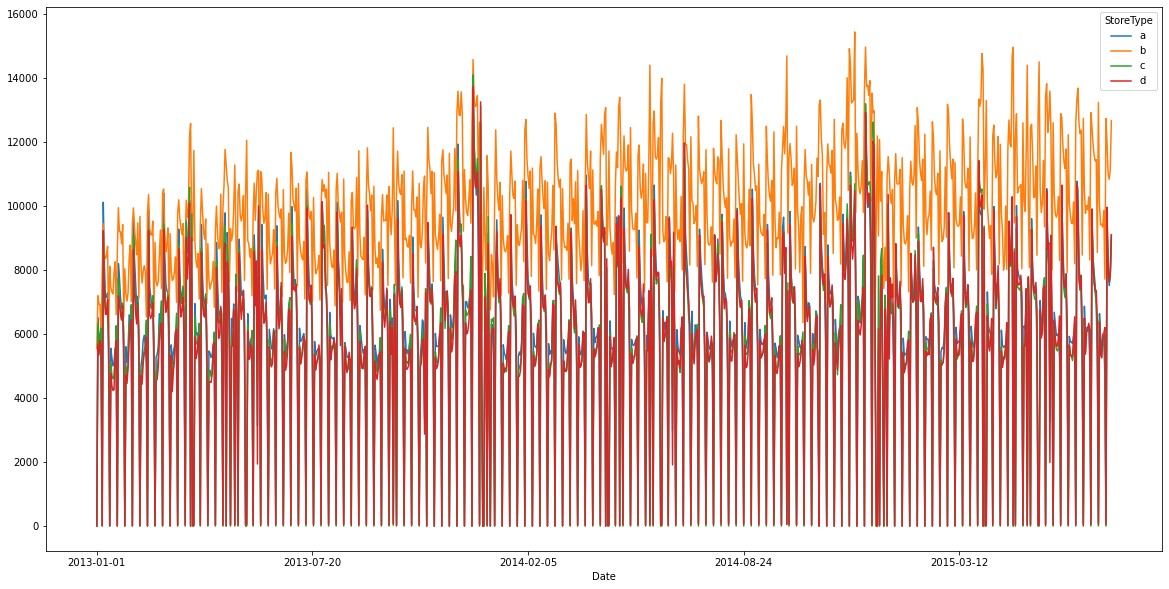

In [146]:
fig, ax = plt.subplots(figsize=(20,10))
df_all.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

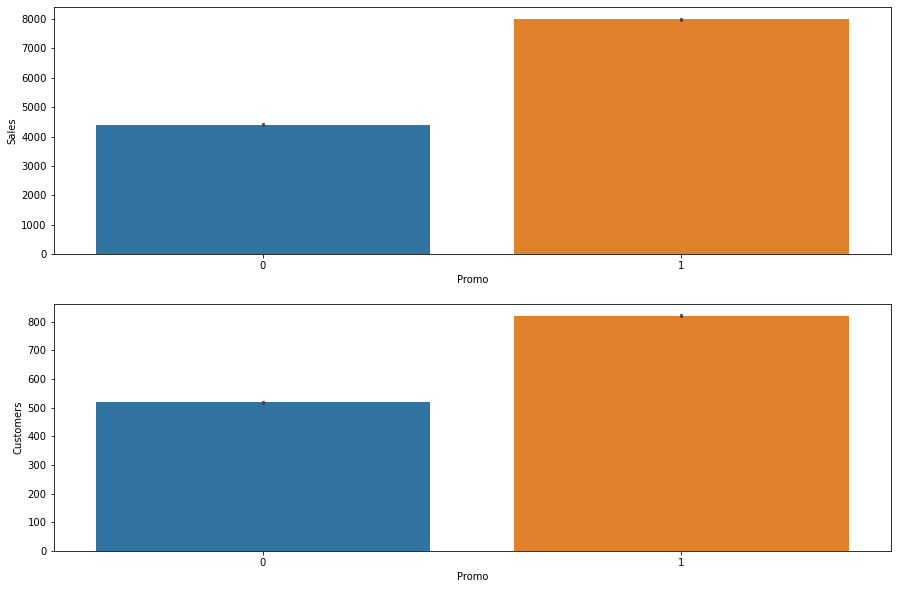

In [147]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = df_all)
plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = df_all)


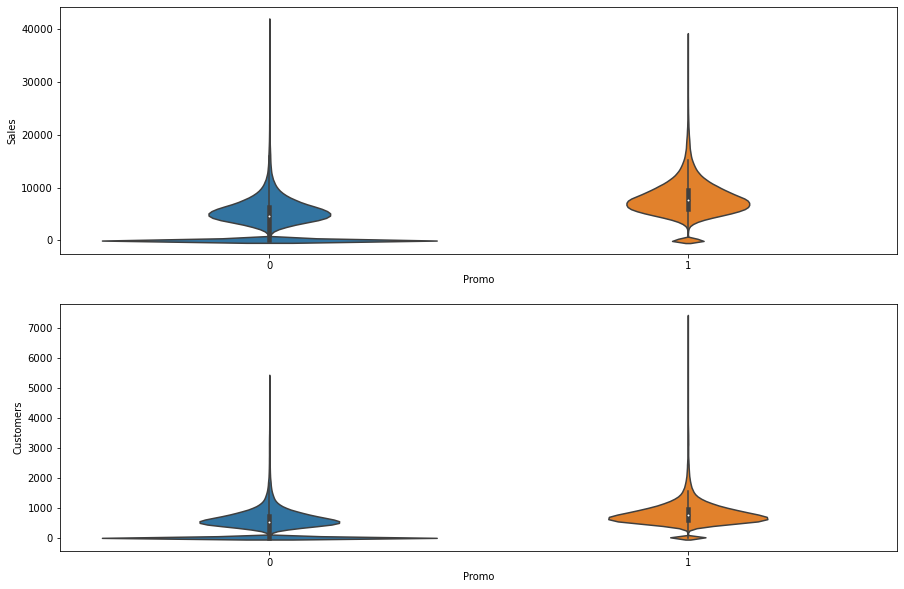

In [148]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = df_all)
plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = df_all)

## TRAIN THE MODEL PART A

In [149]:
!pip install fbprophet

  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)


In [150]:
from fbprophet import Prophet

In [151]:
def sales_prediction(Store_ID, df, periods):
    # Function that takes in the data frame, storeID, and number of future period forecast
    # The function then generates date/sales columns in Prophet format
    # The function then makes time series predictions
    df = df[df['Store'] == Store_ID]
    df = df[['Date', 'Sales']].rename(columns = {'Date':'ds', 'Sales' : 'y'})
    df = df.sort_values('ds')
    
    model = Prophet()
    model.fit(df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


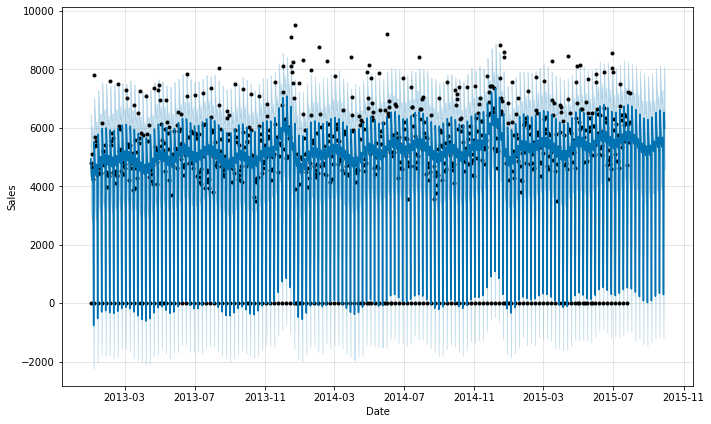

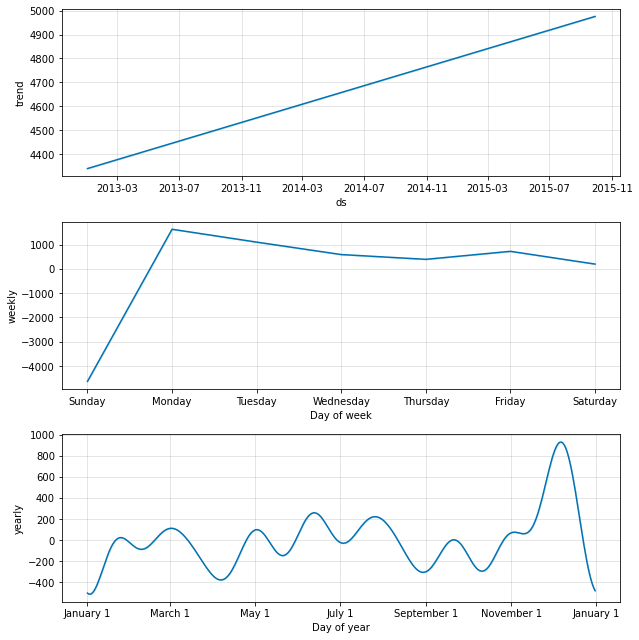

In [152]:
sales_prediction(10, df_all, 60)

In [153]:
def sales_prediction(Store_ID, df, holidays, periods):
    # Function that takes in the data frame, storeID, and number of future period forecast
    # The function then generates date/sales columns in Prophet format
    # The function then makes time series predictions
    df = df[df['Store'] == Store_ID]
    df = df[['Date', 'Sales']].rename(columns = {'Date':'ds', 'Sales' : 'y'})
    df = df.sort_values('ds')
    
    model = Prophet(holidays=holidays)
    model.fit(df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)

In [154]:
# Get all the dates pertaining to school holidays 
school_holidays = df_all[df_all['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(181721,)

In [155]:
# Get all the dates pertaining to state holidays 
state_holidays = df_all[(df_all['StateHoliday']=='a') | (df_all['StateHoliday']=='b') | (df_all['StateHoliday']=='c') | (df_all['StateHoliday']=='d')].loc[:,'Date'].values

In [156]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})

In [157]:
# concatenate both school and state holidays 
school_state_holidays = pd.concat((state_holidays, school_holidays))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


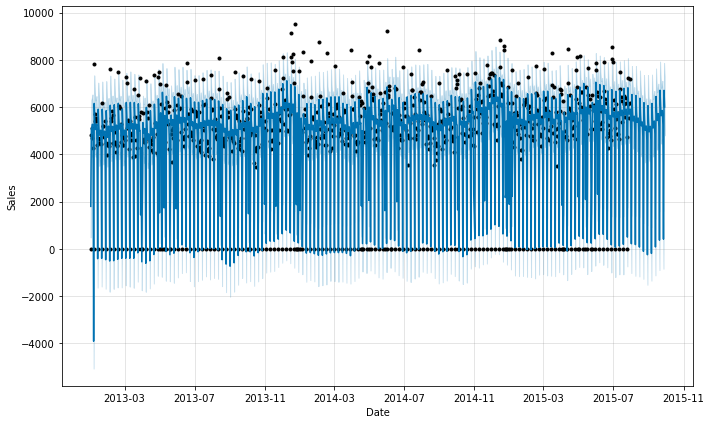

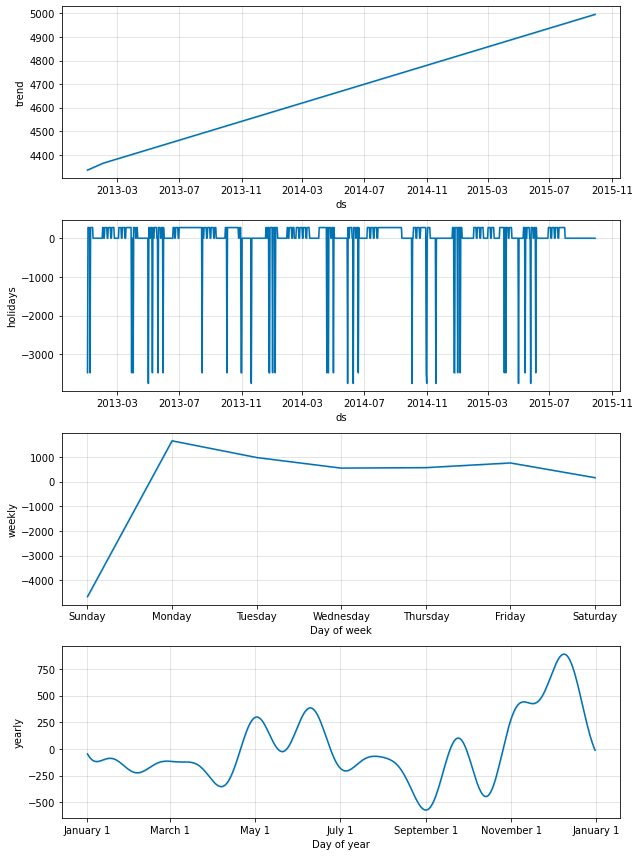

In [158]:
# Let's make predictions using holidays for a specific store
sales_prediction(10, df_all, school_state_holidays, 60)